Connected to Python 3.13.1

In [1]:
# Impoort libraries
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.datasets import fetch_lfw_people  # type: ignore

In [ ]:
# import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

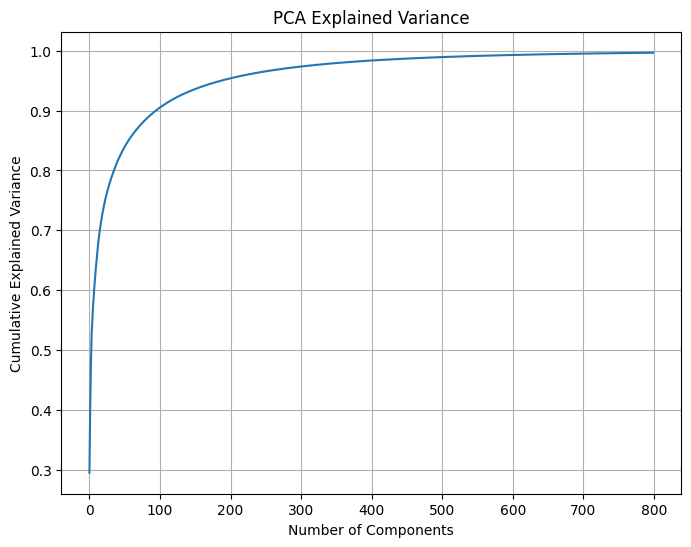

In [ ]:
# Plot the PCA explained variance ratio
pca = PCA(n_components=800, whiten=True, random_state=42).fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

Number of images of Vladimir Putin: 49


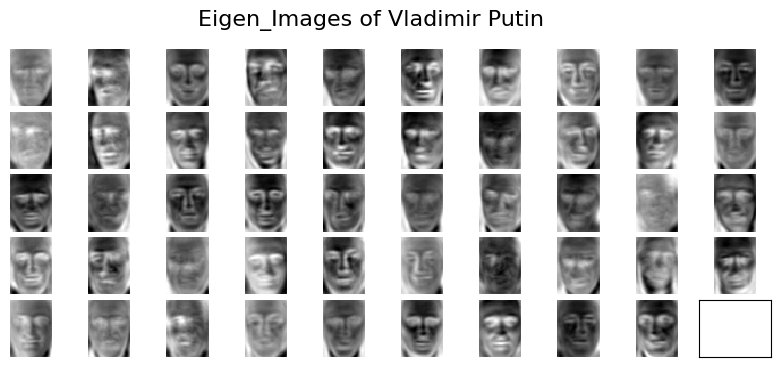

In [ ]:
# Plot Eigen_Images for n_components=100
# PCA on all features X, in order to print Eigen_Images afterwards
pca_plot_eigen = PCA(n_components=100, whiten=True, random_state=42).fit(X_train)
X_pca_plot_eigen = pca_plot_eigen.transform(X)
X_pca_plot_eigen_inv = pca_plot_eigen.inverse_transform(X_pca_plot_eigen)

# plot of Eigen_Images (PCA reduced information)
plot_data_points(data=X_pca_plot_eigen_inv, name='Vladimir Putin', prefix='Eigen') # plots the transformed images

In [ ]:
# PCA on training data, then dimension reduction on training and test data
pca = PCA(n_components=800, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Number of images of Vladimir Putin: 49


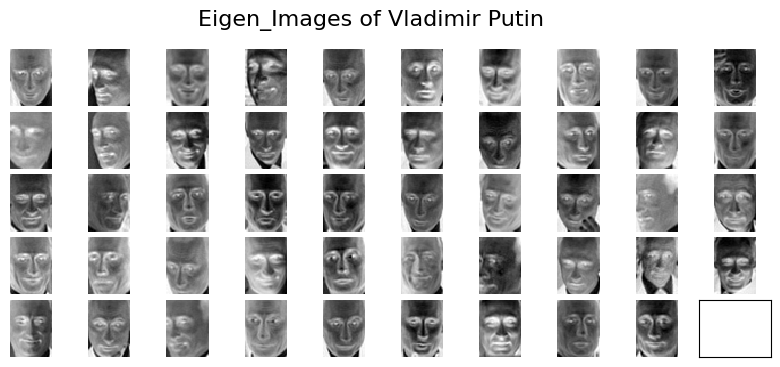

In [ ]:
# PCA on all features X, in order to print Eigen_Images afterwards
X_pca = pca.transform(X)
X_pca_inv = pca.inverse_transform(X_pca)

# plot of Eigen_Images (PCA reduced information)
plot_data_points(data=X_pca_inv, name='Vladimir Putin', prefix='Eigen') # plots the transformed images

In [ ]:
# import libraries
from sklearn.svm import SVC # type: ignore
from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.pipeline import Pipeline # type: ignore

In [ ]:
# Create a gridsearchCV with SVC
pg = {
    'C': [1000, 10000],
    'gamma': [0.0001, 0.001],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', None],
    }

grid = GridSearchCV(SVC(), param_grid=pg, refit=True, verbose=2)
grid.fit(X_train_pca, y_train)

print(f'Best parameters: {grid.best_params_}')

grid_predictions = grid.predict(X_test_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\z\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear; total time=  13.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear; total time=  13.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear; total time=  13.2s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear; total time=  13.2s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear; total time=  13.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=  15.7s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=  15.5s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=  15.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=  15.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=  15.5s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  13.4s
[CV] END C=1000, class_weight=balanced, gamma=0.

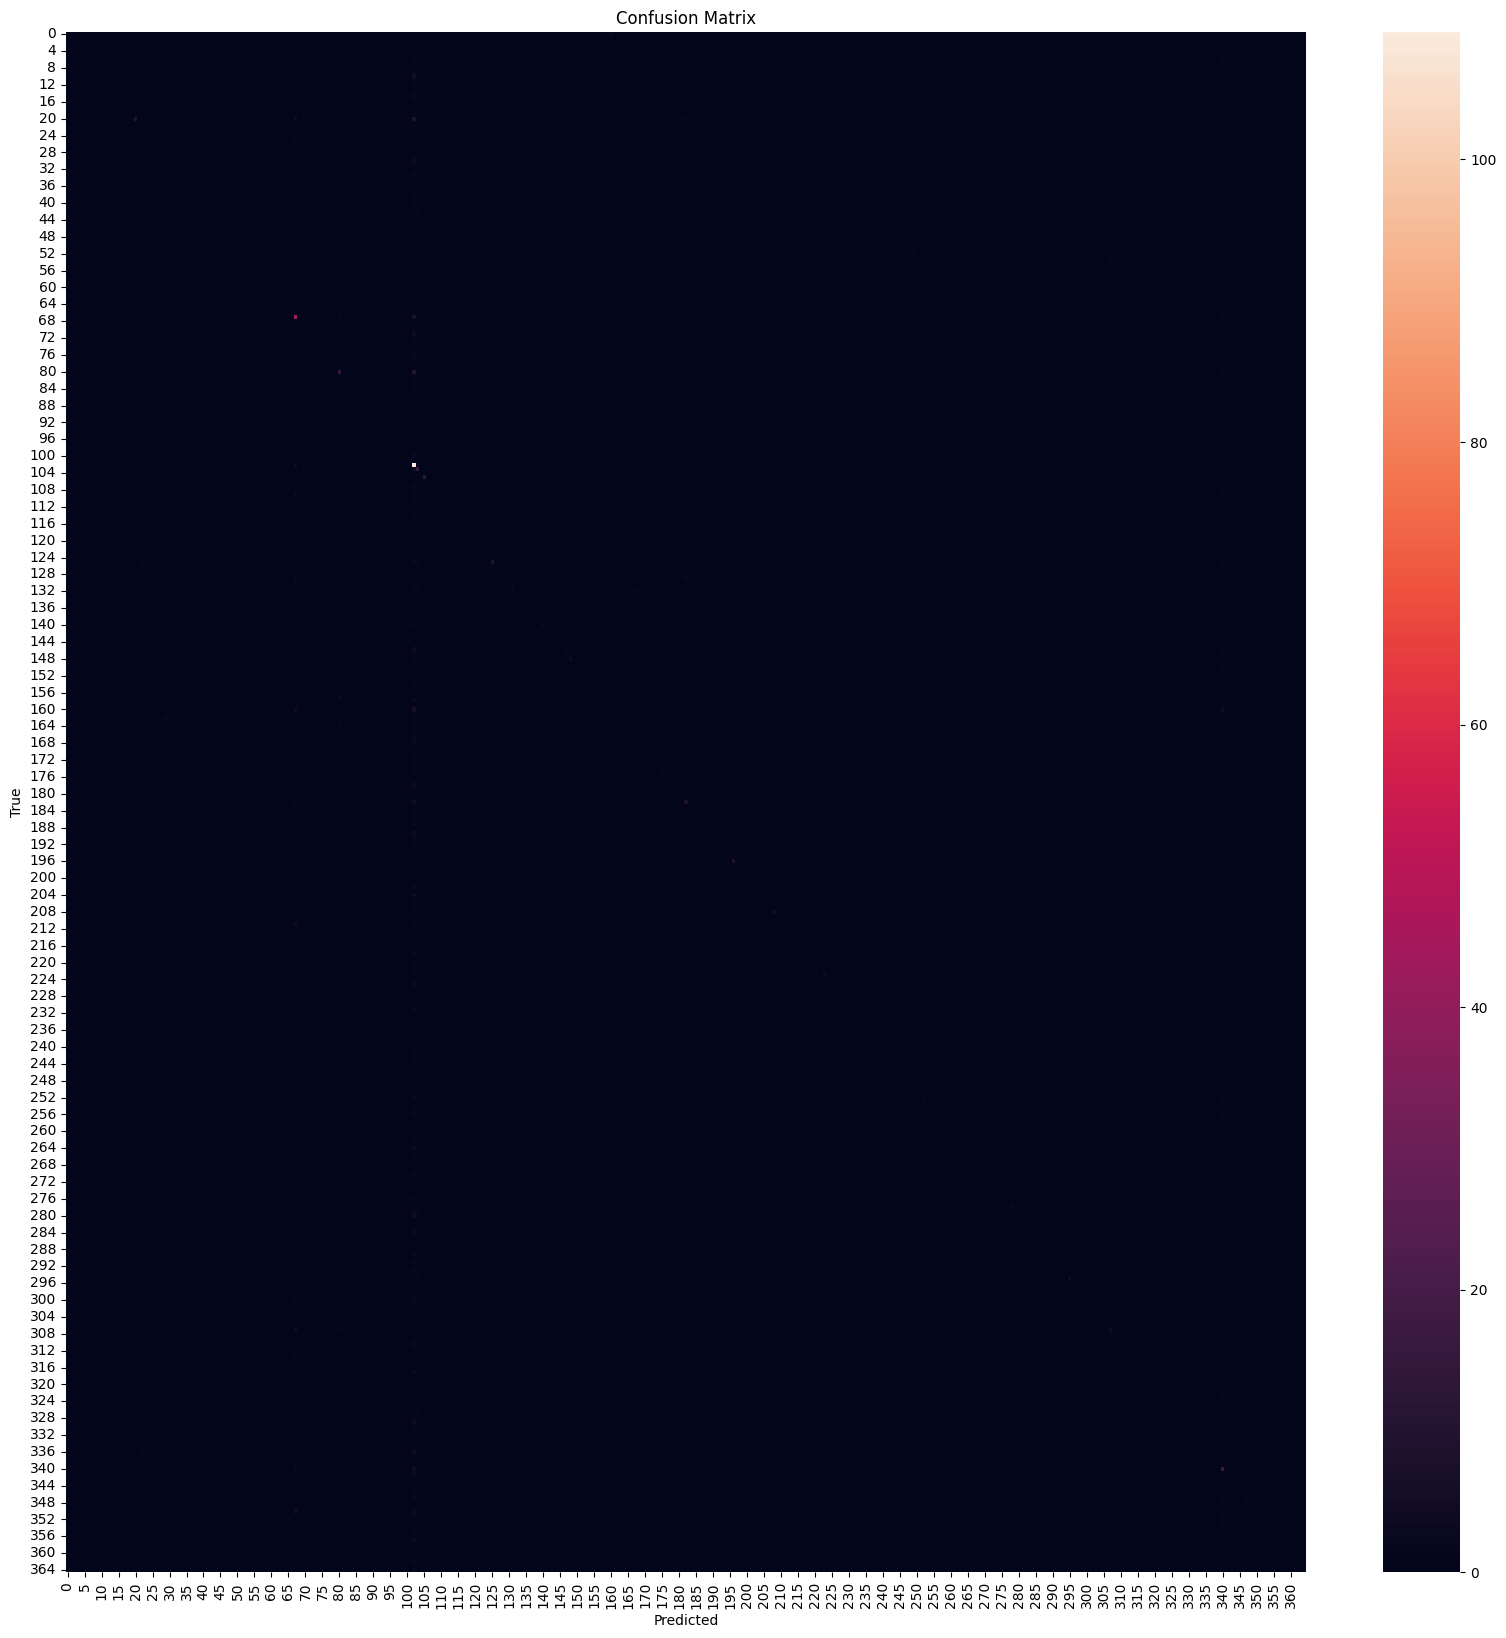

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           9       0.10      0.25      0.14         8
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          14       0.50      0.17      0.25         6
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       0.50      0.22      0.31         9
          18       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         3
          23       0.00    

c:\Users\z\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\z\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\z\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

In [ ]:
# Plot confusion matrix and classification report

# import libraries
from sklearn.metrics import classification_report, confusion_matrix # type: ignore

# Plot confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data = confusion_matrix(y_test, grid_predictions))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot classification report
print(classification_report(y_test, grid_predictions))